# Simple linear regression - kichik loyiha

---
*qanday ishlashini ko'ramiz*

```



                                                                                                                created by Navruzbek_Abduganiyev

In [3]:
import pandas as pd
df=pd.read_csv("/content/housing_LR.csv",index_col=0)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


**Ayrim ustunlar ta'rifi**


*   level - qavati
*   max_level - uy necha qavat ekanligi 



In [4]:
# SIMPLE LINEAR REGRESSION da bitta ustundan foydalangan holda model yaratamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7278 entries, 0 to 7464
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7278 non-null   object 
 1   rooms       7278 non-null   int64  
 2   size        7278 non-null   float64
 3   level       7278 non-null   int64  
 4   max_levels  7278 non-null   int64  
 5   price       7278 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 398.0+ KB


In [5]:
df.describe()

,rooms,size,level,max_levels,price
count,7278.000000,7278.00000,7278.000000,7278.000000,7278.000000
mean,2.578318,70.11898,3.689338,5.992718,54092.074196
std,1.030179,29.32120,2.228360,2.583194,29665.210900
min,1.000000,1.00000,1.000000,1.000000,2.000000
25%,2.000000,50.00000,2.000000,4.000000,34800.000000
50%,2.000000,65.00000,3.000000,5.000000,45500.000000
75%,3.000000,83.00000,5.000000,9.000000,65000.000000
max,8.000000,279.00000,18.000000,25.000000,220000.000000


In [6]:
df["district"].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

In [10]:
#chilonzorda uylar ko'p ekan,biz aynan  shu hudud uchun model yaratamiz
df=df[df['district']=="Чиланзарский"]

In [12]:
# SLR da aytdikki bitta ustundan foydalanamiz
df.corrwith(df["price"]).sort_values(ascending=False)

price         1.000000
size          0.843639
rooms         0.703835
max_levels    0.340015
level         0.138780
dtype: float64

In [13]:
#demak kattagina korrelyatsiya size ustunimizda ekan
X = df["size"]
Y = df['price']

In [14]:
#bular o'rtasidagi chiziqli bo'g'liqlikni tekshirib ko'ramiz
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
%matplotlib inline

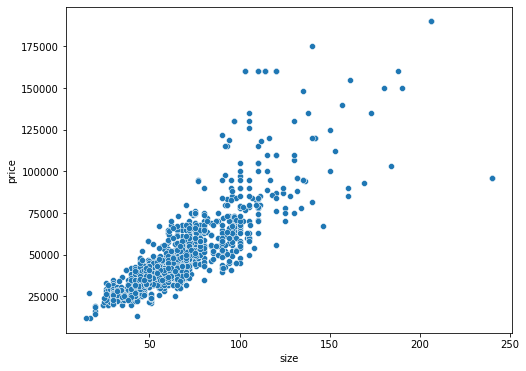

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df,x=X,y=Y)
plt.show()

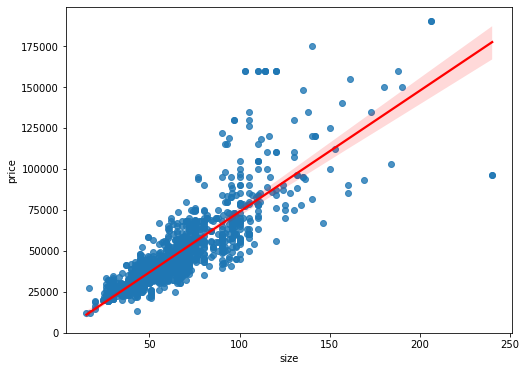

In [21]:
plt.figure(figsize=(8,6))
sns.regplot(data=df,x=X,y=Y,line_kws={"color":"r"})
plt.show()  # bizda yaxshigina chiziqli bog'liqlik bor,ayrim noodatiy qiynatlarni aytmaganda

In [ ]:
# chiziqli bo'gliqlikda gradient tushishini aniqlashimiz kerak.Buning uchun SLR ning maxsus 
#koeffitsient formulalari bor

theta1 = sum((x1-Xmean)*(y1-Ymean))/sum((x1-Xmean)**2)

theta0 = Ymean - theta1*Xmean 

In [24]:
Xmean = np.mean(X.to_numpy())
Ymean = np.mean(Y.to_numpy())

In [25]:
theta1 = sum((X-Xmean)*(Y-Ymean))/sum((X-Xmean)**2)
theta0=Ymean - theta1*Xmean   #koeffitsiyentlarimmiz tayyor

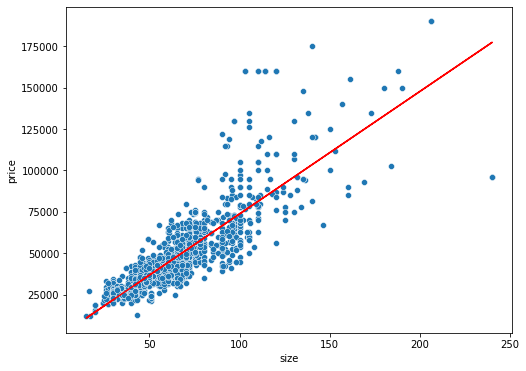

In [32]:
# y = theta0 + theta1*X   ----> ushbu formula orqali biz qiymatlarni olishumiz mumkin.Aynan SLR ham shu  formul asosida ishlaydi
#bog'liqlik grafigunu chizib ko'ramiz
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x=X,y=Y)
plt.plot(np.asanyarray(X),theta0 + theta1*X,c="r")
plt.show()  #bundan oldin biz bog'liqlik chizig'ini bitta funksiya orqali chizgan edik,hozir uzimiz keltirib chizdik

In [35]:
#Model yaratamiz
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,random_state=12,train_size=0.8)

In [52]:
X_train = np.asanyarray(train_set[["size"]])
Y_train = np.asanyarray(train_set[['price']])

In [49]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

In [53]:
LR_model.fit(X_train,Y_train)

LinearRegression()

In [57]:
X_test = np.asanyarray(test_set[["size"]])
Y_test = np.asanyarray(test_set[["price"]])


In [58]:
predict_test = LR_model.predict(X_test)

In [60]:
#modelni baholaymiz
from sklearn.metrics import mean_squared_error,mean_absolute_error
RMSE = np.sqrt(mean_squared_error(predict_test,Y_test))
MAE = mean_absolute_error(predict_test,Y_test)
print(f'RMSE = {RMSE}')
print(f"MAE = {MAE}")

RMSE = 11644.093598333991
MAE = 6887.574715884342
